## Heart Disease Analysis

**Hungarian Heart Disease Dataset**

The dataset used for this analysis is the "Hungarian Heart Disease Dataset" extracted from Hungarian Institute of Cardiology, and written by Andras Janosi, M.D.. This database measures 14 different attributes: age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholestoral (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels (ca), thal, and the diagnosis of heart disease (num).

**Introduction**

Heart disease refers to conditions that affect the regular functions of the heart, stemming from several root causes. Medical conditions including high blood pressure, diabetes, and lifestyle risks such as long term unhealthy diets, overuse of tobacco and alcohol, stress, etc. are risk factors of heart diseases. Many symptoms can indicate potential heart disease, such as high blood pressure, shortness of breath, etc.

Coronary Artery Disease (CAD) is also one of the largest causes of death internationally, and medical services to diagnose this disease can be costly and time-consuming. With the large range of risk factors and causes for this prevalent disease, it is important to recognize symptoms in a time and cost-efficient manner.

Heart diseases are classified based on elements such as the ST depression ratio and resting blood pressure, among others. Resting blood pressure refers to the pressure of the arteries when blood is pumped into the heart and is measured in mmHg. 

The ST depression ratio refers to the ratio of the ST segment depression (on an ECG) of the patient during exercise relative to that at rest. This depression is in the ST interval, which is a graphical representation between the depolarization and repolarization of the ventricle in the heart. The ST segment is typically horizontal, with either an elevation or a depression being a symptom of some abnormality in the heart. As shown in the figure below, the length of the ST depression is measured on the ECG graph (Figure 1). In this dataset, the ST depression of an ECG taken while the participant is exercising is compared to one taken while the participant is at rest in a ratio, with a value of 1 indicating a low (or negligible) difference between the two, a value less than 1 indicating lower ST depression while exercising, and a value greater than 1 indicating lower ST depression while at rest. 




![Figure 1](https://upload.wikimedia.org/wikipedia/commons/4/4a/ST_depression_illustration.jpg)

Figure 1: Diagram of ST segment depression on an ECG graph 

Image source: https://upload.wikimedia.org/wikipedia/commons/4/4a/ST_depression_illustration.jpg

**Objective**

We will be predicting the diagnosis of heart disease (indicated by the percentage of narrowing of any major vessel of the heart, with above 50% narrowing being a positive diagnosis) based on measurements of the ST depression ratio and resting blood pressure using the Heart Disease Data Set containing Hungarian heart disease patients’ medical conditions.


**Methods**

By selecting num (diagnosis of heart disease), ST depression, and maximum heart rate, we will conduct a K-nearest neighbors classification model to predict the existence of a diagnosis from different values of these variables. We will split the data into training and testing sets, then complete the cross validation process to calculate the value of K with maximum validation accuracy. The data will be visualized with a scatter plot with different colors to differentiate the positive/negative diagnosis', as well as a line graph to see which K is most accurate. Workflows and tibbles will be used to represent numerical data and ensure the reader follows the steps and calculations accordingly. 

**Preliminary exploratory data analysis**

First, we start by loading the R packages with the library function that contain all necessary functions for our analysis.

In [2]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels) 
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

We will now read in the file from the download url, then add column names based on the data's webpage's specifications. This will add the lost row of information to the dataset and convert varieties to factor.

In [3]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data")
colnames(heart_data) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
head(heart_data)

Warning message:
“Duplicated column names deduplicated: '2' => '2_1' [7], '0' => '0_1' [9], '0' => '0_2' [10], '?' => '?_1' [12], '?' => '?_2' [13], '0' => '0_3' [14]”
Parsed with column specification:
cols(
  `28` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `130` = col_character(),
  `132` = col_character(),
  `0` = col_character(),
  `2_1` = col_character(),
  `185` = col_character(),
  `0_1` = col_character(),
  `0_2` = col_double(),
  `?` = col_character(),
  `?_1` = col_character(),
  `?_2` = col_character(),
  `0_3` = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0


*Table 1.1: Raw data table*

Now, we will add in the missing row of data that was erased when they were replaced with column names.

In [4]:
heart_data[nrow(heart_data) + 1,] = list(28, 1, 2, "130", "132", "0", "2", "185", "0", 0, "?", "?", "?", 0)
tail(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
65,1,4,130,275,0,1,115,1,1.0,2,?,?,1
28,1,2,130,132,0,2,185,0,0.0,?,?,?,0


*Table 1.2: Raw data (add missing row of data)*

The missing data from the original data set is market with "?", however we will convert it to NA to specify the data values are not available for that observation and variable.

In [5]:
heart_data$trestbps <- gsub("?", NA, heart_data$trestbps, fixed = TRUE)
heart_data$chol <- gsub("?", NA, heart_data$chol, fixed = TRUE)
heart_data$fbs <- gsub("?", NA, heart_data$fbs, fixed = TRUE)
heart_data$restecg <- gsub("?", NA, heart_data$restecg, fixed = TRUE)
heart_data$thalach <- gsub("?", NA, heart_data$thalach, fixed = TRUE)
heart_data$exang <- gsub("?", NA, heart_data$exang, fixed = TRUE)
heart_data$slope <- gsub("?", NA, heart_data$slope, fixed = TRUE)
heart_data$ca <- gsub("?", NA, heart_data$ca, fixed = TRUE)
heart_data$thal <- gsub("?", NA, heart_data$thal, fixed = TRUE)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


*Table 1.3: Raw data (convert ? to NA)*

The dataset varies between categorical and numerical variables, however all numeric variables were automatically converted into characters when read in. We will convert them into numeric variables by using the mutate function.

In [6]:
heart_data_clean <- heart_data %>% 
                        mutate(trestbps = as.numeric(trestbps)) %>% 
                        mutate(chol = as.numeric(chol)) %>% 
                        mutate(fbs = as.numeric(fbs)) %>% 
                        mutate(restecg = as.numeric(restecg)) %>% 
                        mutate(thalach = as.numeric(thalach)) %>% 
                        mutate(exang = as.numeric(exang)) %>% 
                        mutate(slope = as.numeric(slope)) %>% 
                        mutate(ca = as.numeric(ca)) %>% 
                        mutate(thal = as.numeric(thal)) 

Now that the data has been wrangled through mutating, filtering, etc, we will write this data frame into R to use in the next step of our analysis.

In [7]:
write_csv(heart_data_clean, "heart_data_clean.csv")

The original data set represented categorical values in vectors as integers, however we will convert them back to their actual definition in the table to improve readability and simplicity.

In [8]:
heart_data_fct <- heart_data_clean %>% 
                    mutate(sex = factor(sex, labels = c("female", "male"))) %>% #1 = male; 0 = female
                    mutate(cp = factor(cp, labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic"))) %>% #chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
                    mutate(fbs = factor(fbs, labels = c("false", "true"))) %>% #if fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
                    mutate(restecg = factor(restecg, labels = c("normal", "abnormality", "hypertrophy"))) %>% #resting electrocardiographic results -- 0: normal -- 1: ST-T wave abnormality -- 2: probable or definite left ventricular hypertrophy
                    mutate(exang = factor(exang, labels = c("no", "yes"))) %>% #exercise induced angina (1 = yes; 0 = no)
                    mutate(slope = factor(slope, labels = c("upsloping", "flat", "downsloping"))) %>% #11. #41 (slope) the slope of the peak exercise ST segment -- 1 : upsloping -- 2: flat -- 3: downsloping
                    mutate(thal = factor(thal, labels = c("normal", "fixed", "reversible"))) %>% #3 = normal; 6 = fixed defect; 7 = reversable defect
                    mutate(num = factor(num, labels = c("less than 50", "more than 50"))) #diagnosis of heart disease (angiographic disease status) -- 0: < 50% diameter narrowing -- 1: > 50% diameter narrowing

colnames(heart_data_fct) = c("age", "sex", "chest_pain", "resting_pressure", "serum_chol", "fasting_blood_sugar", "resting_ecg", "max_heartrate", "exercise_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_data_fct

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
29,male,atypical angina,140,NA,false,normal,170,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,female,atypical angina,180,393,false,normal,110,yes,1,flat,NA,reversible,more than 50
65,male,asymptomatic,130,275,false,abnormality,115,yes,1,flat,NA,NA,more than 50
28,male,atypical angina,130,132,false,hypertrophy,185,no,0,NA,NA,NA,less than 50


*Table 1.4: Clean data*

We will once again write in the wrangled and tidy data to use for KNN classification.

In [9]:
write_csv(heart_data_fct, "heart_data_fct.csv")

In [10]:
set.seed(9999)

Set seed to ensure a reproducible code.

Now, we will split the data into a training and testing set, using tidymodels' 'initial_split' function. The data will be split 75% training data and 25% testing data, and this function enables shuffled and stratified training/testing sets. This is crucial as it ensures randomness in the data analysis, not splitting the data in an organized fashion, and inputting roughly equal proportions of the class labels for (num) in each dataframe.

In [11]:
#Split the data into training set and test set

heart_data_split <- initial_split(heart_data_fct, prop = 0.75, strata = num)
training_heart_data <- training(heart_data_split)
testing_heart_data <- testing(heart_data_split)
training_heart_data

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
32,female,atypical angina,105,198,false,normal,165,no,0,NA,NA,NA,less than 50
32,male,atypical angina,125,254,false,normal,155,no,0,NA,NA,NA,less than 50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,male,asymptomatic,155,342,true,normal,150,yes,3,flat,NA,NA,more than 50
65,male,asymptomatic,130,275,false,abnormality,115,yes,1,flat,NA,NA,more than 50
28,male,atypical angina,130,132,false,hypertrophy,185,no,0,NA,NA,NA,less than 50


*Table 1.5: Training data*

Summary of the training data for exploratory data analysis.

In [12]:
summary(training_heart_data)

      age            sex                 chest_pain resting_pressure
 Min.   :28.00   female: 64   typical angina  : 8   Min.   : 92.0   
 1st Qu.:43.00   male  :157   atypical angina :77   1st Qu.:120.0   
 Median :49.00                non-anginal pain:43   Median :130.0   
 Mean   :48.17                asymptomatic    :93   Mean   :132.6   
 3rd Qu.:54.00                                      3rd Qu.:140.0   
 Max.   :66.00                                      Max.   :200.0   
                                                    NA's   :1       
   serum_chol    fasting_blood_sugar      resting_ecg  max_heartrate  
 Min.   : 85.0   false:199           normal     :173   Min.   : 82.0  
 1st Qu.:209.0   true : 16           abnormality: 41   1st Qu.:124.0  
 Median :246.0   NA's :  6           hypertrophy:  6   Median :140.0  
 Mean   :251.9                       NA's       :  1   Mean   :139.4  
 3rd Qu.:284.0                                         3rd Qu.:154.0  
 Max.   :603.0        

*Table 1.6: Summary for each variable*

In [13]:
avg_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(mean, na.rm = TRUE)
#Dataframe that contains: Average of all numerical variables

max_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(max, na.rm = TRUE)
#Dataframe that contains: Maximum of all numerical variables

min_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(min, na.rm = TRUE)
#Dataframe that contains: Minimum of all numerical variables

table_dbl <- rbind(avg_training_heart_data, max_training_heart_data, min_training_heart_data) 
df <- data.frame(summary = c('average','max','min'))
table_dbl <- cbind(df, table_dbl)
table_dbl
#Summarize numerical variables in a table

summary,age,resting_pressure,serum_chol,max_heartrate,oldpeak,ca
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
average,48.17195,132.6364,251.8683,139.3545,0.5533937,0
max,66.00000,200.0000,603.0000,190.0000,5.0000000,0
min,28.00000,92.0000,85.0000,82.0000,0.0000000,0


*Table 1.7: Average, maximum, minimum value of each numerical variable*

Table 1.7 creates a data frame entailing the key statistics of the training data.

We will now use the group_by and summarize functions to count the number of observations in each variable. This is useful as we will also count the number of missing observations in our dataset, and use this information to eliminate those variables that barely provide value.

In [14]:
#Summarize number of observations of each categorical variable

num_obs_cp <- training_heart_data %>%
              group_by(chest_pain) %>%
              summarize(n = n())
num_obs_cp  

num_obs_sex <- training_heart_data %>%
              group_by(sex) %>%
              summarize(n = n())
num_obs_sex

num_obs_fasting_blood_sugar <- training_heart_data %>%
              group_by(fasting_blood_sugar) %>%
              summarize(n = n())
num_obs_fasting_blood_sugar

num_obs_resting_ecg <- training_heart_data %>%
              group_by(resting_ecg) %>%
              summarize(n = n())
num_obs_resting_ecg

num_obs_exercise_angina <- training_heart_data %>%
              group_by(exercise_angina) %>%
              summarize(n = n())
num_obs_exercise_angina

num_obs_slope <- training_heart_data %>%
              group_by(slope) %>%
              summarize(n = n())
num_obs_slope

num_obs_thal <- training_heart_data %>%
              group_by(thal) %>%
              summarize(n = n())
num_obs_thal

num_obs_num <- training_heart_data %>%
              group_by(num) %>%
              summarize(n = n())
num_obs_num

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<fct>,<int>
typical angina,8
atypical angina,77
non-anginal pain,43
asymptomatic,93


`summarise()` ungrouping output (override with `.groups` argument)



sex,n
<fct>,<int>
female,64
male,157


`summarise()` ungrouping output (override with `.groups` argument)



fasting_blood_sugar,n
<fct>,<int>
false,199
true,16
NA,6


`summarise()` ungrouping output (override with `.groups` argument)



resting_ecg,n
<fct>,<int>
normal,173
abnormality,41
hypertrophy,6
NA,1


`summarise()` ungrouping output (override with `.groups` argument)



exercise_angina,n
<fct>,<int>
no,151
yes,69
NA,1


`summarise()` ungrouping output (override with `.groups` argument)



slope,n
<fct>,<int>
upsloping,10
flat,67
downsloping,1
NA,143


`summarise()` ungrouping output (override with `.groups` argument)



thal,n
<fct>,<int>
normal,4
fixed,9
reversible,7
NA,201


`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
less than 50,141
more than 50,80


*Table 1.8: Number of observations for each categorical variable*

Now, we will count the number of missing data points for each variable.

In [15]:
#missing data

miss_obs_row <- nrow(na.omit(training_heart_data))
miss_obs_row 

miss_obs_column <- training_heart_data %>%
                   map_df(~sum(is.na(.)))
miss_obs_column

[1] 1

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,1,16,6,1,1,1,0,143,219,201,0


*Table 1.9: Number of missing data for each variable*

Due to the extremely high amount of missing data for the ca column (Number of major vessels (0-3) colored by flourosopy), we will not consider it as a predictor. 221 out of 222 observations are missing for it.

Forward selection will now be performed to iteratively build this model one predictor at a time, in order to calculate which set of variable yields the highest accuracy. Each of these additional predictors will form a candidate model, and finally the set of predictor variables with the highest cross-validation accuracy will be chosen.

In [16]:
#Forward selection

heart_subset <- training_heart_data %>%
                filter(!is.na(serum_chol))%>%
                select(num, age, resting_pressure, serum_chol, max_heartrate, oldpeak)

names <- colnames(heart_subset %>% select(-num))


accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

heart_vfold <- vfold_cv(heart_subset, v = 5, strata = num)

n_total <- length(names)

selected <- c()

for (i in 1:n_total) {
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        heart_recipe <- recipe(as.formula(model_string), data = heart_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        acc <- workflow() %>%
          add_recipe(heart_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>%
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ oldpeak,0.7657898
2,num ~ oldpeak+max_heartrate,0.8061847
3,num ~ oldpeak+max_heartrate+age,0.7819396
4,num ~ oldpeak+max_heartrate+age+serum_chol,0.7697445
5,num ~ oldpeak+max_heartrate+age+serum_chol+resting_pressure,0.7518873


*Table1.10: Forward selection result*

The data will now be visualized by histograms to illustrate the distribution of patients diagnosed/not diagnosed with heart disease according to their measurements for each variable. The facet_grid function will be used to separate histograms in accordance to their diagnosis of heart disease (<50 or >50). This will illustrate the standing effect each variable has on the presence of a diagnosis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


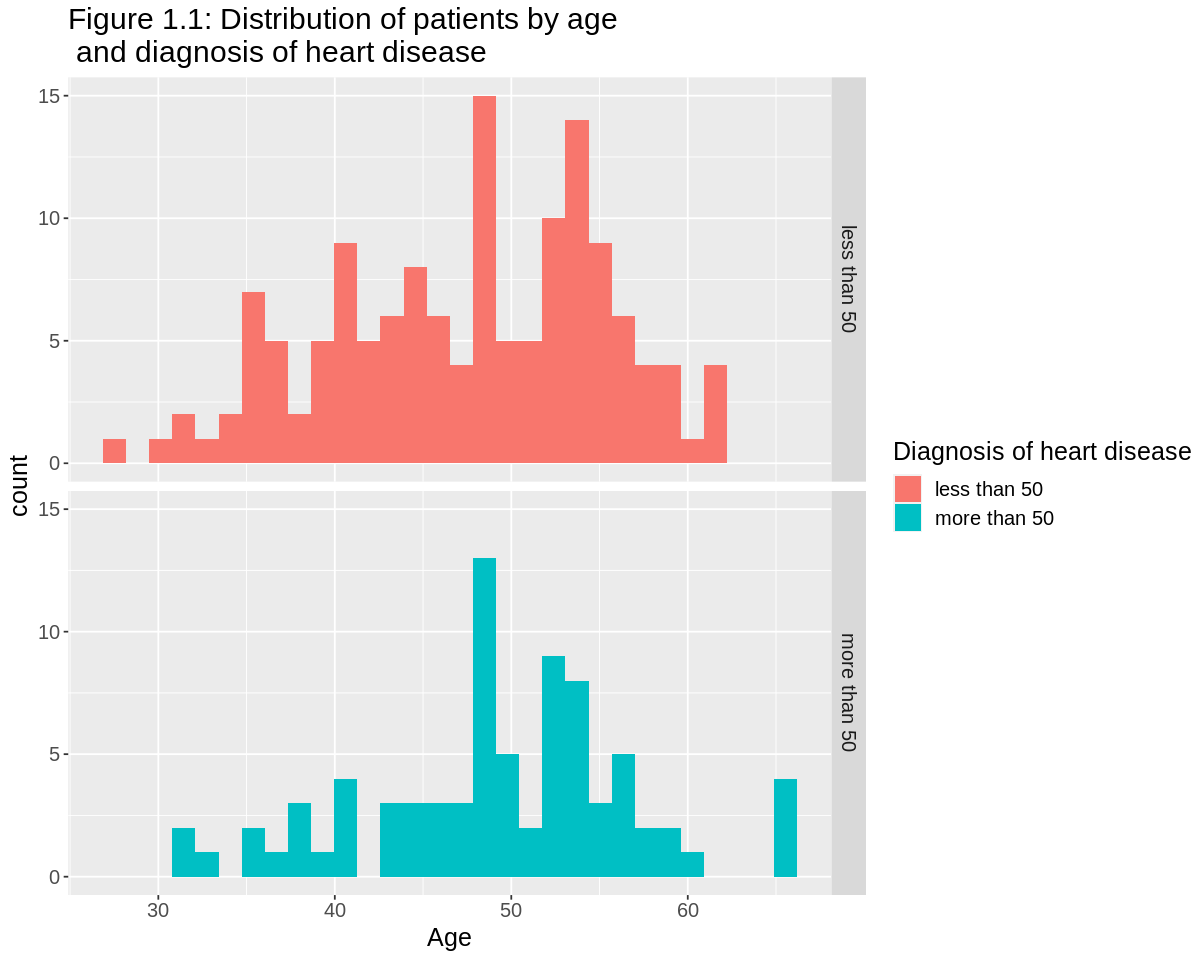

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16 rows containing non-finite values (stat_bin).”


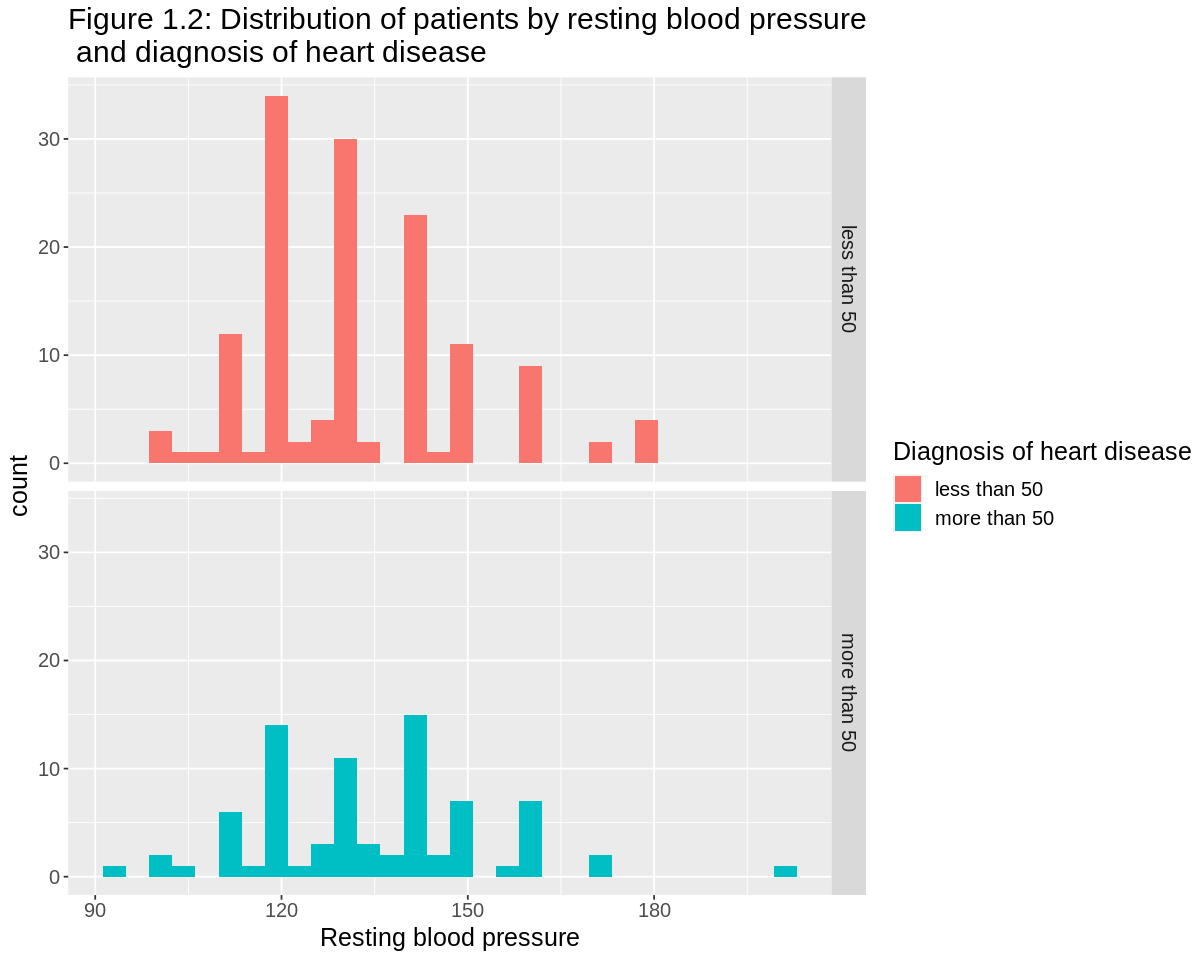

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


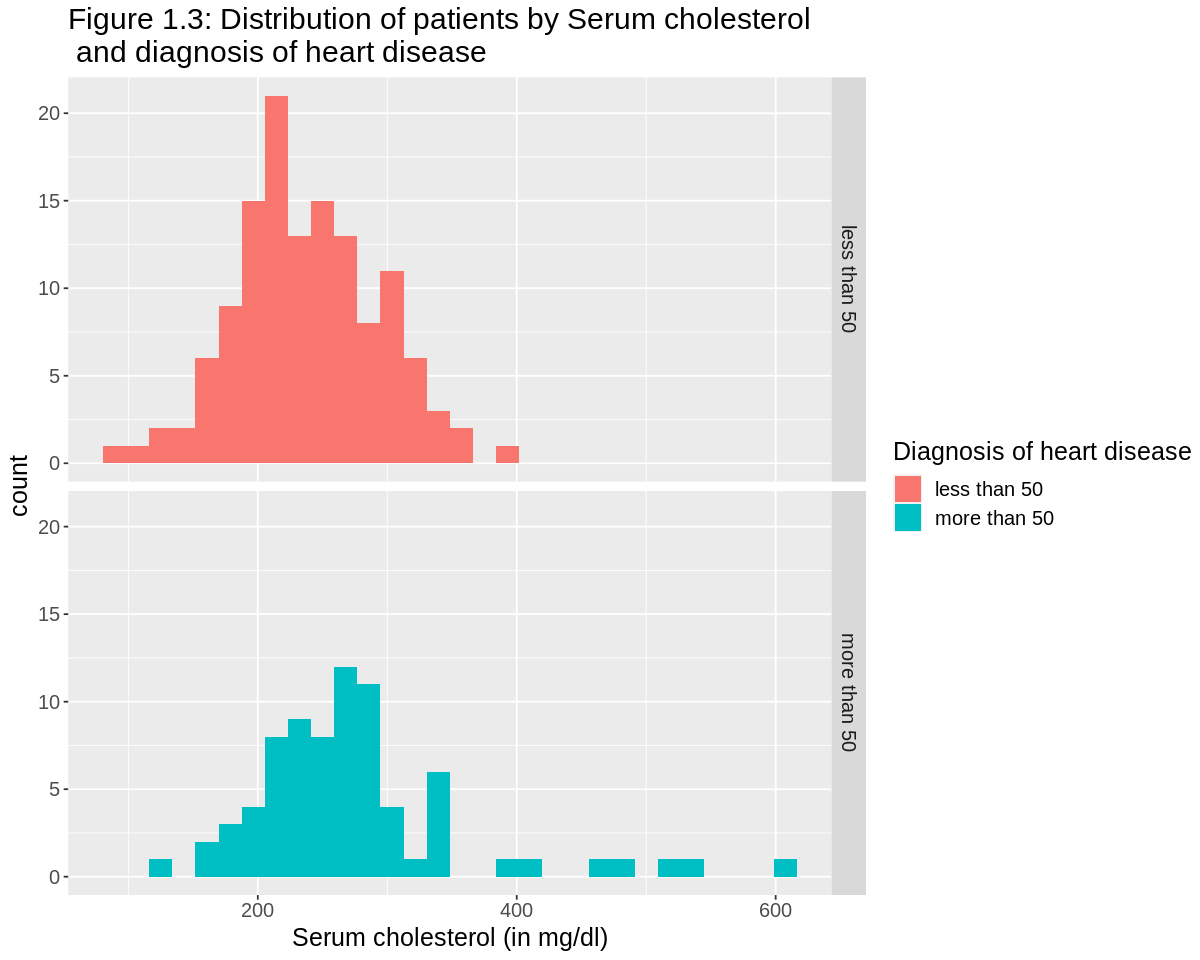

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



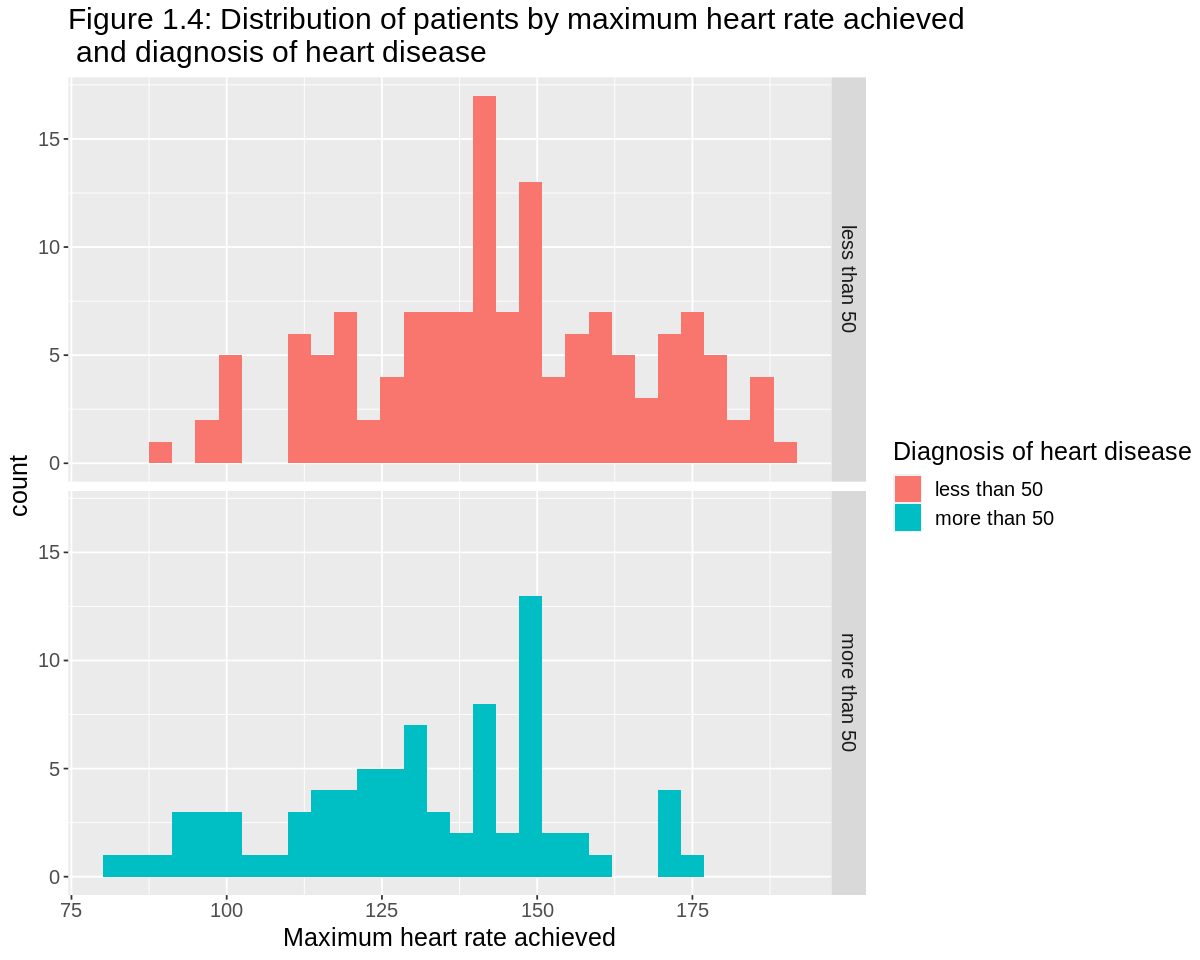

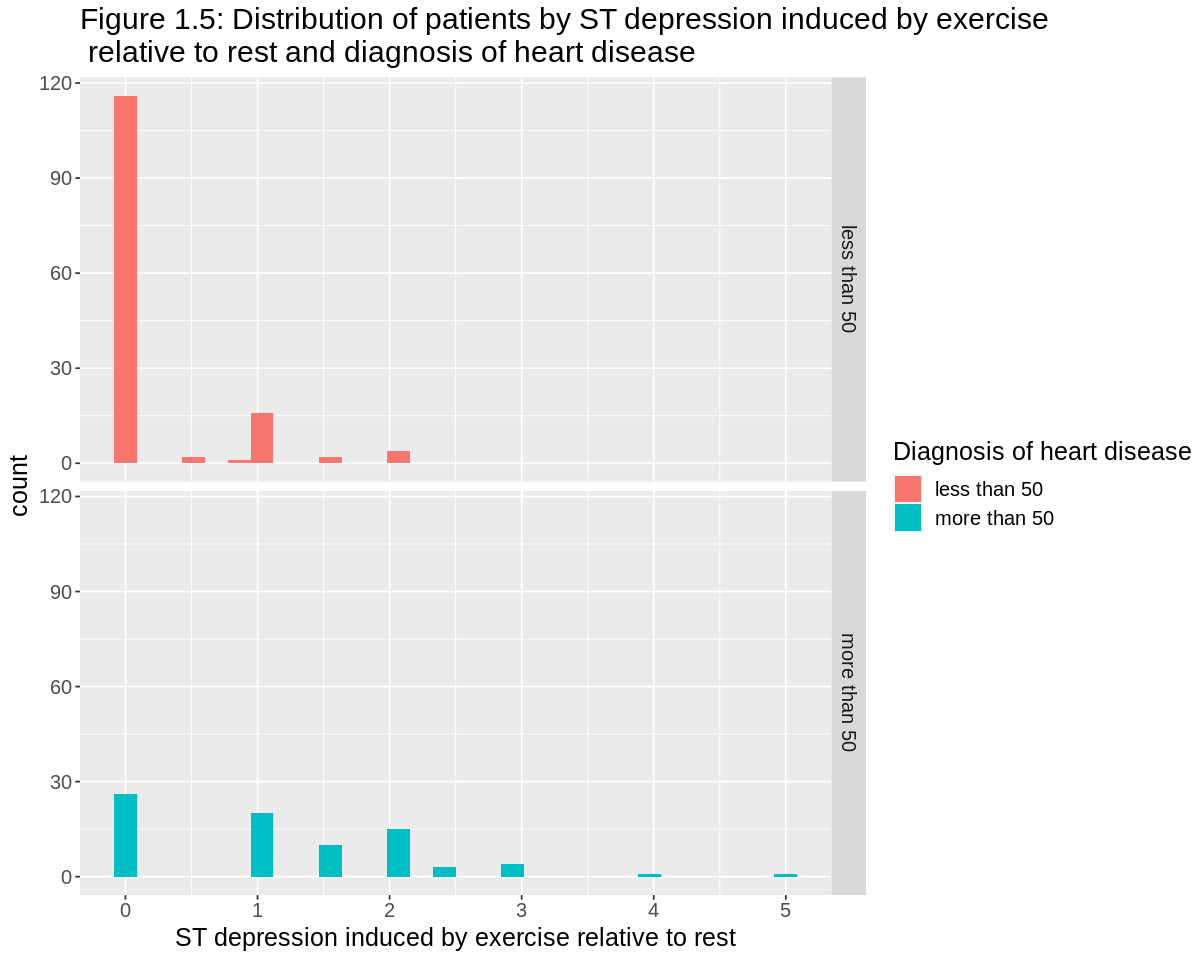

In [17]:
#Visualization
options(repr.plot.height = 8, repr.plot.width = 10)
distribution_age_plot <- training_heart_data %>%
                         select(age, num) %>%
                         ggplot(aes(x = age, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Age', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.1: Distribution of patients by age \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
                          
distribution_age_plot

distribution_rp_plot <- training_heart_data %>%
                         select(resting_pressure, num) %>%
                         ggplot(aes(x = resting_pressure, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Resting blood pressure', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.2: Distribution of patients by resting blood pressure \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_rp_plot

distribution_sc_plot <- training_heart_data %>%
                         select(serum_chol, num) %>%
                         ggplot(aes(x = serum_chol, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Serum cholesterol (in mg/dl)', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.3: Distribution of patients by Serum cholesterol \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_sc_plot

distribution_mhr_plot <- training_heart_data %>%
                         select(max_heartrate, num) %>%
                         ggplot(aes(x = max_heartrate, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Maximum heart rate achieved', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.4: Distribution of patients by maximum heart rate achieved \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_mhr_plot

distribution_op_plot <- training_heart_data %>%
                         select(oldpeak, num) %>%
                         ggplot(aes(x = oldpeak, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'ST depression induced by exercise relative to rest', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.5: Distribution of patients by ST depression induced by exercise \n relative to rest and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_op_plot

**Summary on the histograms**

An obvious difference in the distribution is observed in the histograms of "ST depression induced by exercise relative to rest" and "maximum heartrate achieved". The visual difference in the distribution of their histograms suggests they would be useful predictors. In forward selection, these 2 variables also yielded the highest accuracy, therefore they will be used in the KNN classification model.

Now, we will visualize a scatterplot between ST Depression and Maximum Heartrate achieved; this will demonstrate the relationship between these two variables. 

Warning message:
“Removed 1 rows containing missing values (geom_point).”


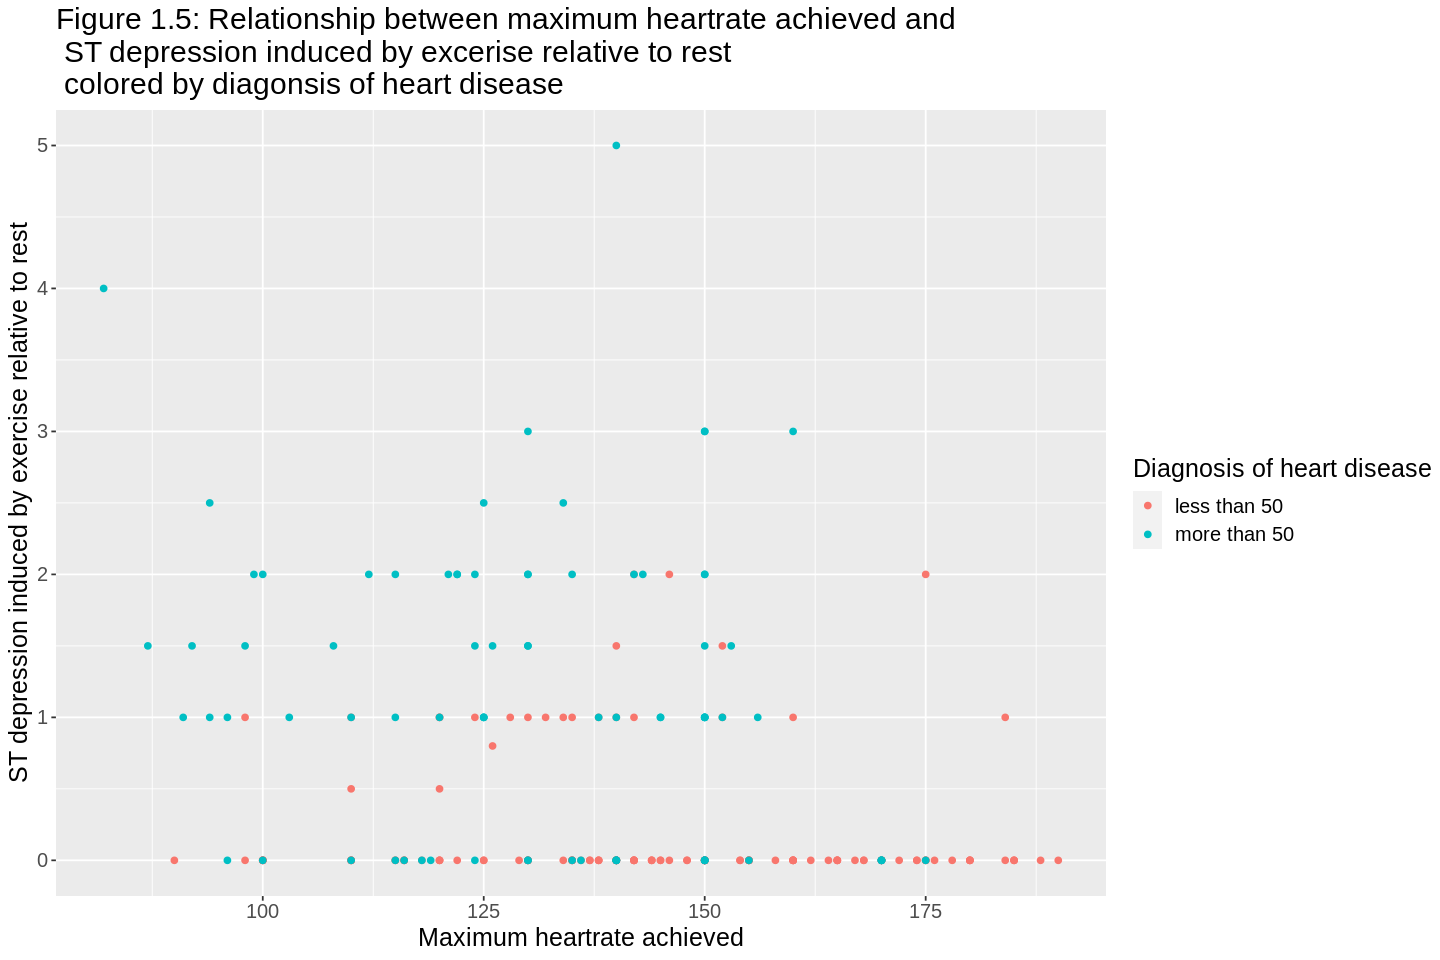

In [18]:
options(repr.plot.height = 8, repr.plot.width = 12)


max_heartrate_vs_oldpeak_plot <- training_heart_data %>%
                                 select(max_heartrate, oldpeak, num) %>%
                                 ggplot(aes(x = max_heartrate, y = oldpeak, color = num)) +
                                 geom_point() +
                                 labs(x = 'Maximum heartrate achieved', y = 'ST depression induced by exercise relative to rest', 
                                      color = 'Diagnosis of heart disease') +
                                 ggtitle('Figure 1.5: Relationship between maximum heartrate achieved and \n ST depression induced by excerise relative to rest \n colored by diagonsis of heart disease') +
                                 theme(text = element_text(size = 15))
max_heartrate_vs_oldpeak_plot

**Summary on the scatterplot**

The scatter plot above show that there is a weak correlation between maximum heartrate achieved and ST depression induced by excerise relative to rest. However, this scatter plot shows that patients without heart disease usually have relatively lower ST Depression (oldpeak) and higher maximum heartrate, whereas patients with heart disease usually have relatively higher ST Depression and lower maximum heartrate.

Now, we will build our classification model. First, we build a model specification for K, calling the nearest_neighbor function and specifying we will use the straight-line distance and KNN classification model. We then build a recipe to preprocess and standardize our vairbales to scale them equally, and finally pass it through a workflow to combine the data analysis steps. We also call the fit function to train our model on our training data. In this model, we will use K=10 neighbors, however we will use parameter value selection later to choose the most accurate K value.

In [85]:
set.seed(9999)
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_fit <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec) %>%
             fit(data = training_heart_data)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~10, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2
Best kernel: rectangular
Best k: 10

We will now predict the class labels for our test set, calling the predict function and measuring its accuracy. To do this, we utilize the bind_cols function to and create the heart_test_prediction tibble. We also create a confusion matrix to visualize those class labels this model predicted correctly and falsely.

In [82]:
heart_test_prediction <- predict(heart_fit, testing_heart_data) %>%
                          bind_cols(testing_heart_data)
heart_test_prediction

heart_prediction_accuracy <- heart_test_prediction %>%
                        metrics(truth = num, estimate = .pred_class)

heart_conf_mat <- heart_test_prediction %>%
                conf_mat(truth = num, estimate = .pred_class)
heart_conf_mat

.pred_class,age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
less than 50,29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
less than 50,29,male,atypical angina,140,NA,false,normal,170,no,0,NA,NA,NA,less than 50
less than 50,31,female,atypical angina,100,219,false,abnormality,150,no,0,NA,NA,NA,less than 50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
more than 50,47,male,asymptomatic,160,291,false,abnormality,158,yes,3,flat,NA,NA,more than 50
more than 50,52,male,asymptomatic,140,266,false,normal,134,yes,2,flat,NA,NA,more than 50
more than 50,58,female,atypical angina,180,393,false,normal,110,yes,1,flat,NA,reversible,more than 50


              Truth
Prediction     less than 50 more than 50
  less than 50           42            9
  more than 50            5           17

Now, we will perform 5-fold cross validation to choose the best paramter value for K - this is to not overwhelm computational power. We initially call the vfold_cv function to specify this, then create a workflow and calling the fit_resamples function to run cross-validation on each training/validation split. We finally tune our model and call the collect_metric function to compute the mean and standard error of the accuracies. Through this, we will produce a table showing which K value(s) provide the highest estimated accuracy.

In [78]:
#Cross-validation
set.seed(9999)

heart_vfold <- vfold_cv(training_heart_data, v = 5, strata = num)

heart_resample_fit <- workflow() %>%
                      add_recipe(heart_recipe) %>%
                      add_model(heart_spec) %>%
                      fit_resamples(resamples = heart_vfold)

heart_metrics <- heart_resample_fit %>% collect_metrics

heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

heart_result <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_tune) %>%
             tune_grid(resamples = heart_vfold, grid = 221) %>%
             collect_metrics()

accuracies <- heart_result %>%
                 filter(.metric == 'accuracy') %>%
                 arrange(desc(mean))
accuracies

x Fold5: model (predictions): Error: Problem with `mutate()` input `.row`.
✖...

x Fold5: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.8305556,4,0.02351470,Model11
12,accuracy,binary,0.8305556,4,0.02351470,Model12
7,accuracy,binary,0.8191919,4,0.02456903,Model07
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,accuracy,binary,0.7625000,4,0.01556721,Model04
2,accuracy,binary,0.7570707,4,0.01932107,Model02
1,accuracy,binary,0.7457071,4,0.02357969,Model01


*Table 2.1: Estimated accuracy for different values of K*

We see that K=11 and K=12 neighbors yielded the highest estimated accuracy of 83.06%. We will now produce a graph to visualize how much the estimated accuracies over different neighbors.

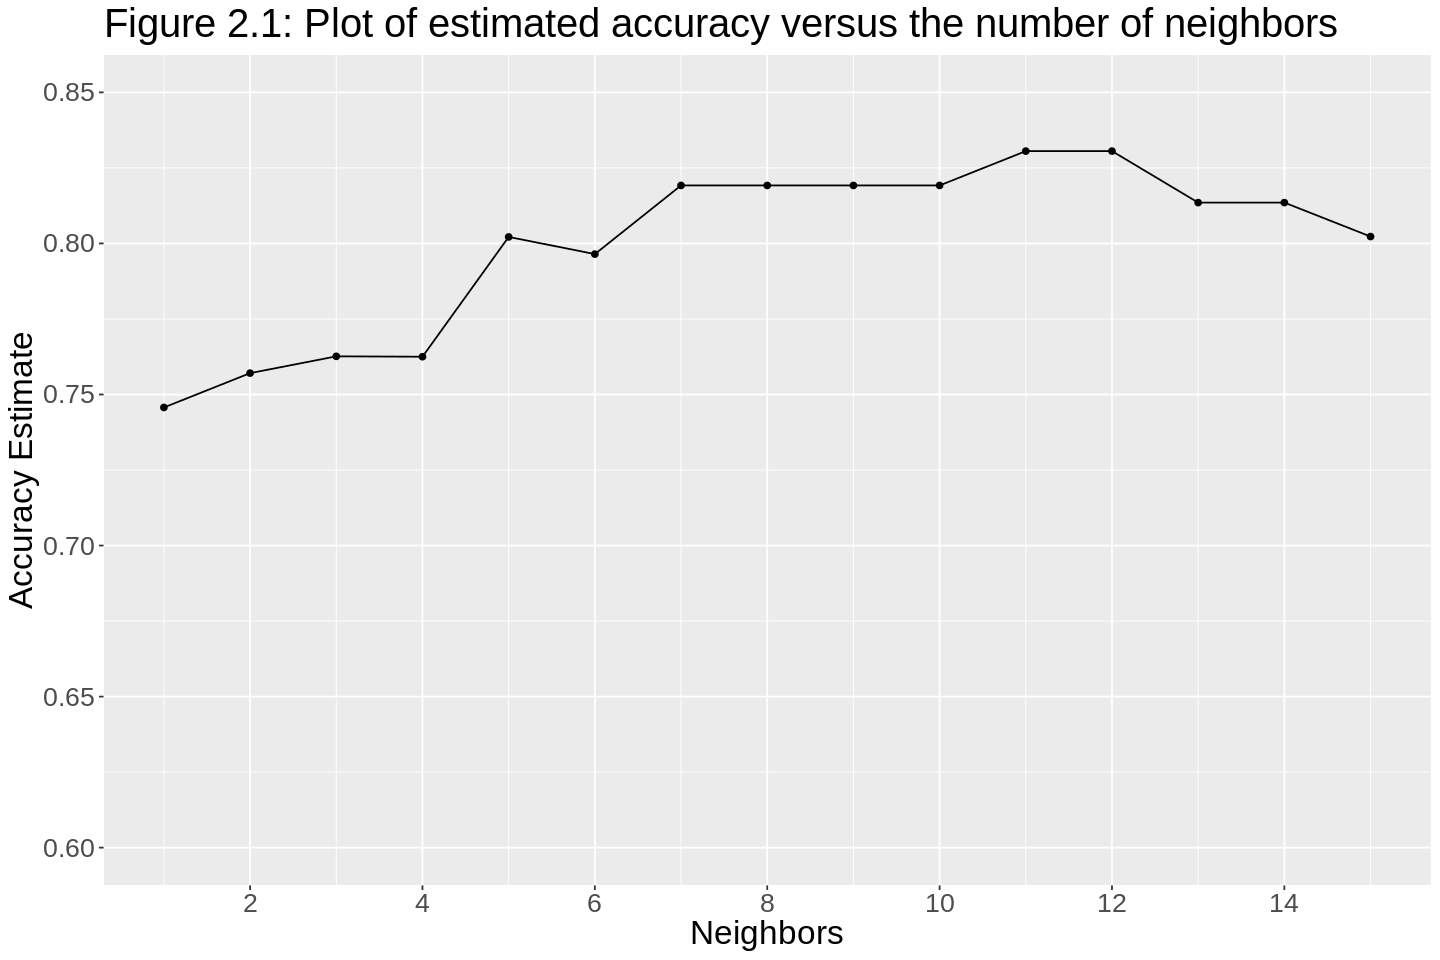

In [79]:
set.seed(9999)
heart_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.6, 0.85)) +
                  ggtitle('Figure 2.1: Plot of estimated accuracy versus the number of neighbors') 
heart_plot

**Summary on the plot**

The plot above indicates that when number of neighbors K is around 7 to 14, the model is roughly optimal, and it will likely be accurate. However, K=11 and K=12 provides the highest accuracies. We will choose K=11 for this model as increasing the K-values will slow down the process and it does not change the provided estimated accuracy. Since changing the value of K doesn't decrease accuracy too much, this suggests that the choice is reliable in the presence of uncertainty.

In [90]:
# Choose K = 11

heart_spec_11 <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())


heart_fit_11 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_11) %>%
             fit(data = training_heart_data)

heart_predict_11 <- predict(heart_fit_11, testing_heart_data) %>%
                 bind_cols(testing_heart_data)

heart_metiric_11 <- heart_predict_11 %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy') 

heart_conf_mat_11 <- heart_predict_11 %>%
                  conf_mat(truth = num, estimate = .pred_class)
heart_conf_mat_11

              Truth
Prediction     less than 50 more than 50
  less than 50           42            9
  more than 50            5           17

Confusion matrix when K = 11*

Now, to test the model against an unknown observation, a new patient with a maximum heartrate achieved of 127 and an ST depression induced by exercise relative to rest of 3.4 is introduced. A diagnosis of heart disease is unnavailable, therefore this model will be used to predict the presence of one.

In [38]:
heart_spec_11 <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
            set_engine("kknn") %>%
            set_mode("classification")

heart_fit_11 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_11) %>%
             fit(data = training_heart_data)

new_patient <- tibble(oldpeak = 3.4, max_heartrate = 127)
new_patient

heart_test_predictions <- predict(heart_fit_11, new_patient) 
heart_test_predictions

oldpeak,max_heartrate
<dbl>,<dbl>
3.4,127


.pred_class
<fct>
more than 50


Table 2.2: Prediction of an unknown diagnosis using K=11 neighbors

The classification model predicted 'more than 50', meaning the patient has a positive diagnosis. 

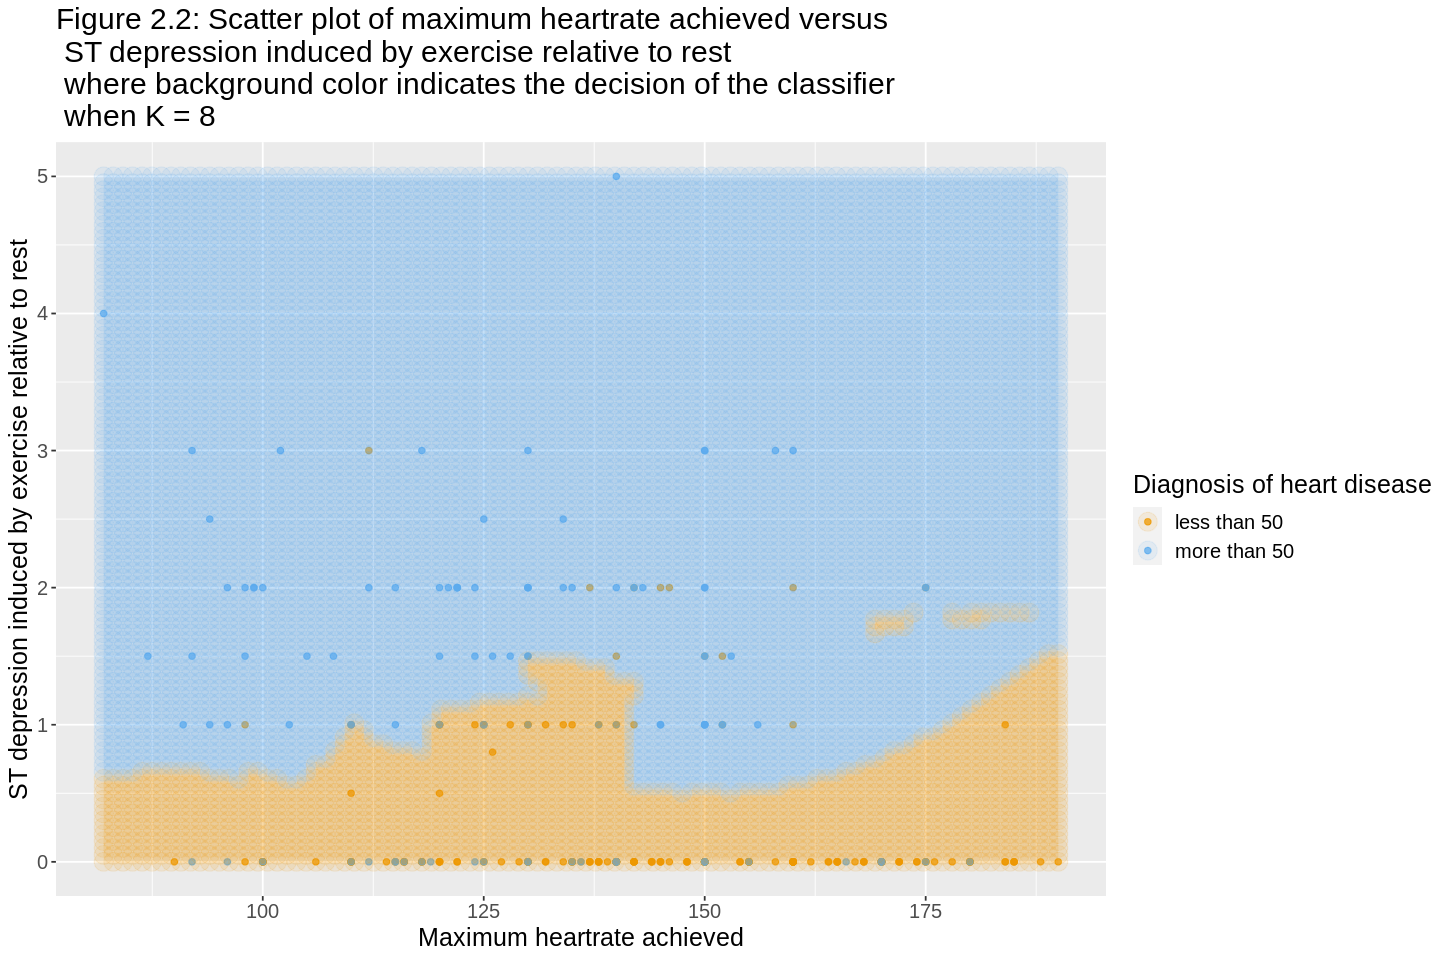

In [89]:
#Visualization of the analysis
heart_data_final <- heart_data_fct %>%
                filter(!is.na(max_heartrate))%>%
                select(num, max_heartrate, oldpeak)

heartrate_grid <- seq(min(heart_data_final$max_heartrate), 
                      max(heart_data_final$max_heartrate), 
                      length.out = 100)

oldpeak_grid <- seq(min(heart_data_final$oldpeak), 
                    max(heart_data_final$oldpeak), 
                    length.out = 100)

heartrate_oldpeak_grid <- as_tibble(expand.grid(max_heartrate = heartrate_grid, 
                                oldpeak = oldpeak_grid))


knnPredGrid <- predict(heart_fit_11, heartrate_oldpeak_grid)

prediction_table <- bind_cols(knnPredGrid, heartrate_oldpeak_grid) %>%
                    rename(num = .pred_class)

analysis_plot <- ggplot() +
                 geom_point(data = heart_data_final, 
                            mapping = aes(x = max_heartrate, y = oldpeak, color = num), 
                 alpha = 0.75) +
                 geom_point(data = prediction_table, 
                            mapping = aes(x = max_heartrate, y = oldpeak, color = num), 
                 alpha = 0.1, 
                 size = 5) +
                 labs(x = 'Maximum heartrate achieved', y = 'ST depression induced by exercise relative to rest', 
                       color = 'Diagnosis of heart disease') +
                 scale_color_manual(labels = c("less than 50", "more than 50"), 
                 values = c("orange2", "steelblue2")) +
                 ggtitle('Figure 2.2: Scatter plot of maximum heartrate achieved versus \n ST depression induced by exercise relative to rest \n where background color indicates the decision of the classifier \n when K = 8') +
                 theme(text = element_text(size = 15))
analysis_plot

The shaded scatterpot above represents which data values will be diagnosed as positive (more than 50) or negative (less than 50). We see that ST Depression has a larger effect, as the shaded area stays yellow no matter the value of maximum heartrate alone. Figure 2.2 is a relatively simple graph, meaning K=11 does not overfit or underfit the data

## DISCUSSION

__Summarize what you found__:

Our data predicts the diagnosis of heart disease, in which the margin of prediction is fairly high; since this is a binary variable, the chances of a correct prediction are 50%. According to the results of forward selection, a model using the ST depression ratio and maximum heart rate as predictors yields the highest accuracy, making these the strongest predictors in the data set. The scatter plot comparing the maximum heart rate achieved to the ST depression induced by exercise relative to rest (Figure 1.5) shows that patients without heart disease usually have relatively lower ST depression exercise-to-rest ratios and higher maximum heart rate, whereas patients with heart disease usually have relatively higher ST depression ratios and lower maximum heart rate. We found the most accurate estimate of K to be K=11 neighbors, through parameter value selection.

We found that ST Depression relative to rest was the strongest predictor, as it yielded an accuracy of 76.57% as a sole predictor in cross validation. K=11 neighbors also yielded an ~83% percent accuracy, meaning out of the approximately 300 observations, it would predict 249 correctly. Relative to the majority classifier, which would predict the values correctly only 50% of the time, our model is relatively better as it provides higher accuracy.

A great limitation faced during the analysis was the limitation of the dataset itself, only containing ~300 observations. Since the sample size was rather small, it does not capture the most reflective part of the real-world data. The data was also limited to only being from Hungarian patients, which decreased worldwide generalizability of the model constructed. Aside from this, a challenge faced when constructing the models was that the K value wasn’t comprehended when plugged in the tune model. Instead, the actual value of observations had to be used in order to run the model. 

__Discuss whether this is what you expected to find?__

The final estimate of an unknown label at the end of our analysis predicted a positive diagnosis for a patient with ST depression=3.4 and maximum heart rate=127. This was quite expected, as higher ST depression levels are very strong predictors of cardiac death, and show uneven heart rates in a patient. 
However, we expected other factors such as age and resting blood pressure to have higher influence and be stronger contributors, so the ~77% accuracy from only ST depression was unexpected.

__Discuss what impact could such findings have?__

These findings are important for the accessibility of diagnoses, since it uses other variables to determine the probability of the percentage of narrowing of a major vessel of the heart (and thereby a decent predictor for diagnosing heart disease) instead of actually collecting measurements of the narrowing. The predictors can be used to track the changes in the heart, which could give information on any potential worsening of heart conditions. Although the analysis does not demonstrate much significance to the real-world healthcare field because of the limitations stated above, it is informative to patients as to how heart disease is diagnosed. This efficient method of analysis can use other quantitative predictors to help diagnose other diseases as well, such as lung or liver disease.

__DIscuss what future questions could this lead to?__

As for the future of heart disease statistics, there remain many different factors that could affect the diagnosis of a patient, including predictors within our data set: serum cholesterol level, age, resting blood pressure, and other predictors that aren’t included. This leads to the questions of what the other predictors might be, and will the variables measured for diagnosing heart diseases also indicate diagnosis of other diseases? As well, what other easier accessed measurements can be used when diagnosing heart diseases to further simplify the process. Regardless of limitations and possible questions for the future, our analysis for the given data set offers a solid foundation for future predictions.


__References__:

Centers for Disease Control and Prevention. (2021, February 1). About Heart Disease. https://www.cdc.gov/heartdisease/about.htm 

Burns, E., Buttner, R. (2022, March 16). The ST Segment. Life in the Fast Lane • LITFL. https://litfl.com/st-segment-ecg-library/



__Source of the data__:

Janosi, A. (1988). Heart Disease Data Set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
